# Assignment 16 - Neural Networks (Gas Turbines)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV

In [2]:
gas_data = pd.read_csv('gas_turbines.csv')
gas_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
gas_data.shape

(15039, 11)

In [4]:
gas_data.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [5]:
gas_data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [6]:
gas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [7]:
gas_data.describe(include='all')

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [8]:
gas_data.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


<Axes: >

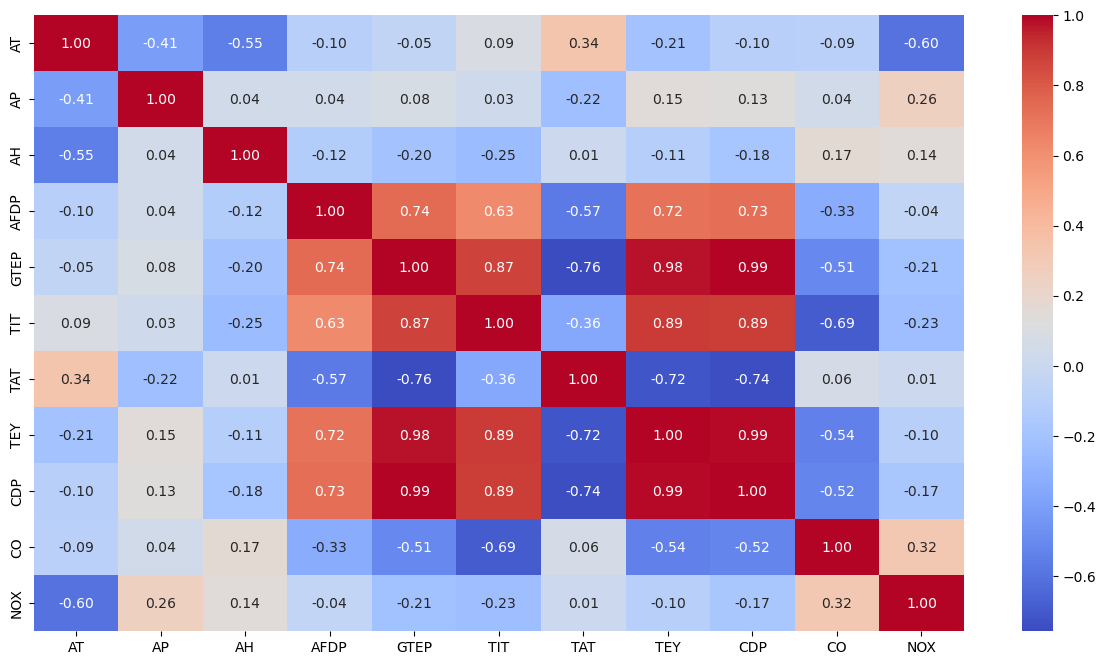

In [9]:
corr = gas_data.corr()
fig, ax = plt.subplots(figsize=(15, 8))
snb.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")

##### Plotting regplot for Age, KM, HP, CC, Doors, Gears, Quarterly_Tax and Weight with respect to TEY 

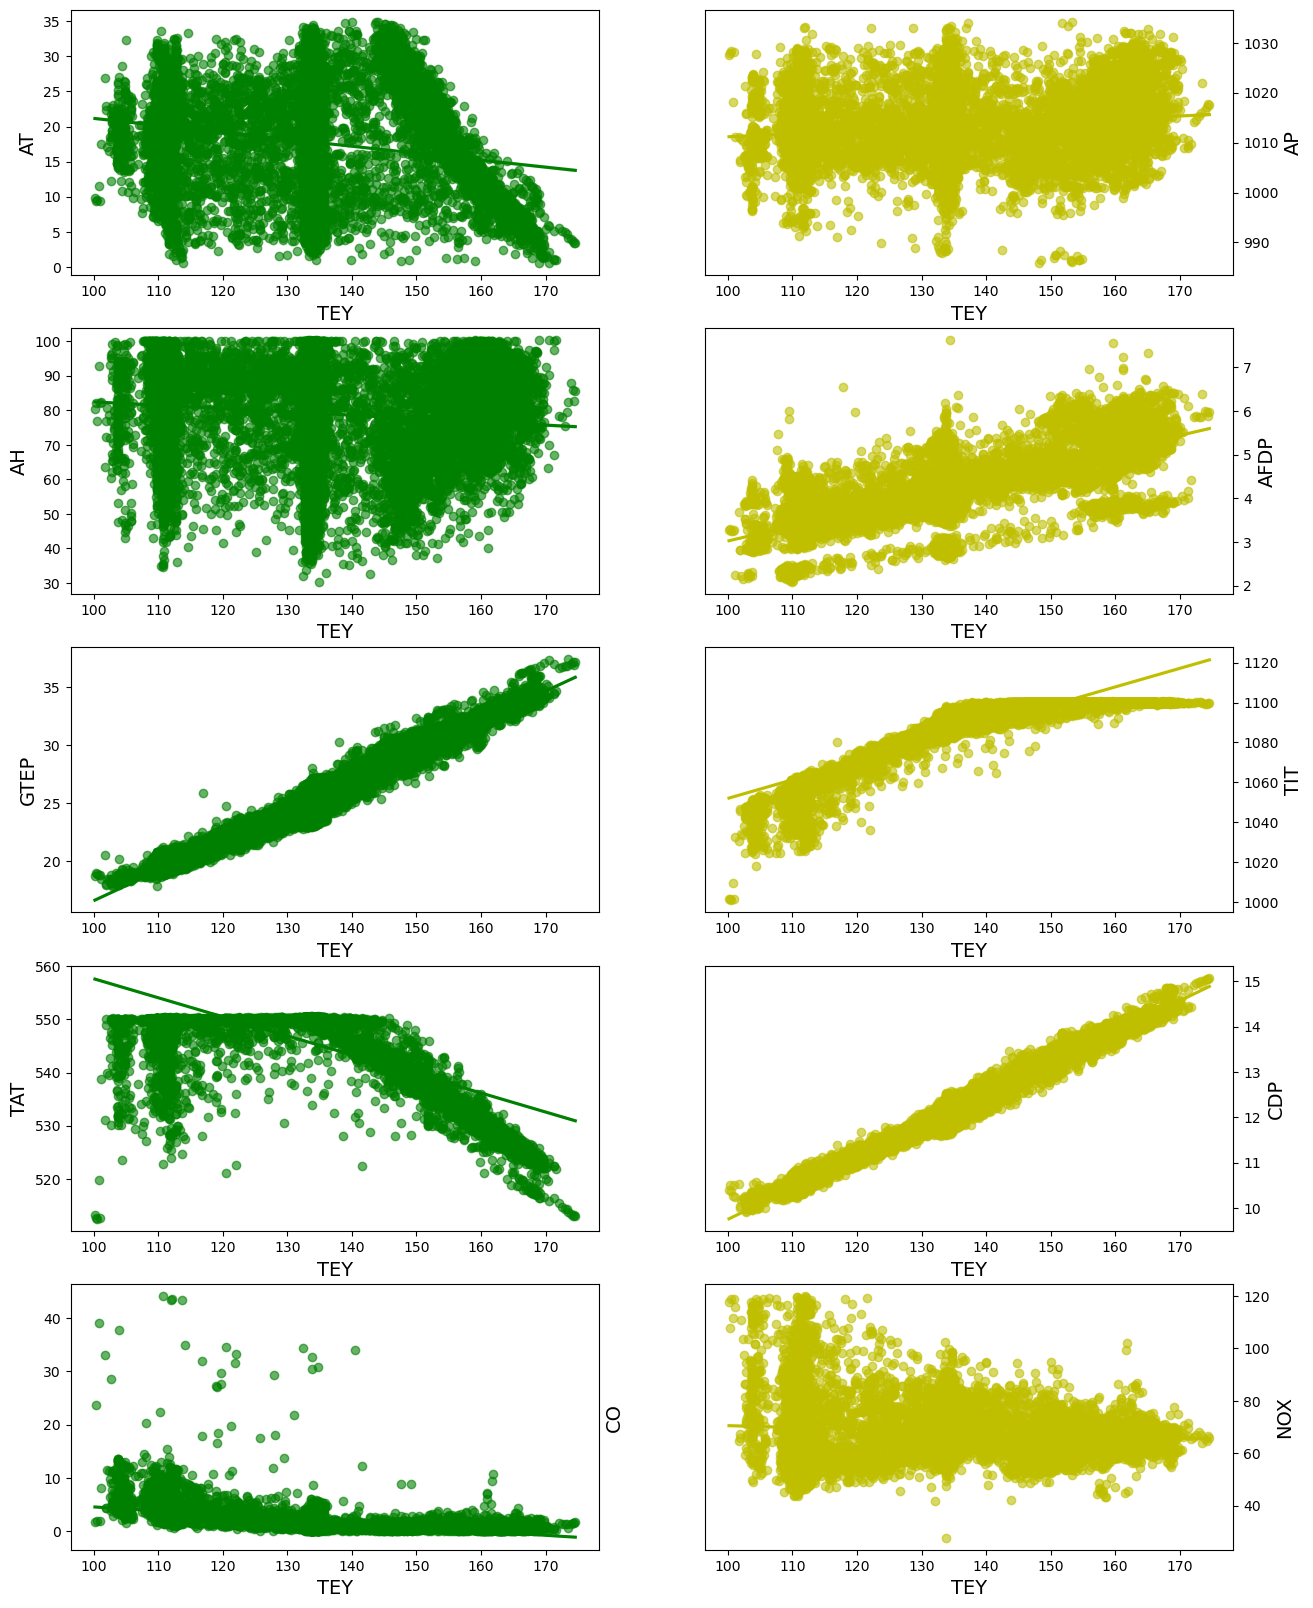

In [10]:
f, axes = plt.subplots(5,2, figsize=(15,20))

snb.regplot(x = 'TEY', y = 'AT', data = gas_data, ax = axes[0,0], color = 'g', scatter_kws={'alpha':0.6})
axes[0,0].set_xlabel('TEY', fontsize = 14)
axes[0,0].set_ylabel('AT', fontsize=14)
axes[0,0].yaxis.tick_left()


snb.regplot(x = 'TEY', y = 'AP', data = gas_data, ax = axes[0,1], color = 'y',scatter_kws={'alpha':0.6})
axes[0,1].set_xlabel('TEY', fontsize = 14)
axes[0,1].set_ylabel('AP', fontsize=14)
axes[0,1].yaxis.set_label_position("right")
axes[0,1].yaxis.tick_right()


snb.regplot(x = 'TEY', y = 'AH', data = gas_data, ax = axes[1,0], color = 'g',scatter_kws={'alpha':0.6})
axes[1,0].set_xlabel('TEY', fontsize = 14)
axes[1,0].set_ylabel('AH', fontsize=14)
axes[1,0].yaxis.tick_left()


snb.regplot(x = 'TEY', y = 'AFDP', data = gas_data, ax = axes[1,1], color = 'y',scatter_kws={'alpha':0.6})
axes[1,1].set_xlabel('TEY', fontsize = 14)
axes[1,1].set_ylabel('AFDP', fontsize=14)
axes[1,1].yaxis.set_label_position("right")
axes[1,1].yaxis.tick_right()


snb.regplot(x = 'TEY', y = 'GTEP', data = gas_data, ax = axes[2,0], color = 'g',scatter_kws={'alpha':0.6})
axes[2,0].set_xlabel('TEY', fontsize = 14)
axes[2,0].set_ylabel('GTEP', fontsize=14)
axes[2,0].yaxis.tick_left()


snb.regplot(x = 'TEY', y = 'TIT', data = gas_data, ax = axes[2,1], color = 'y',scatter_kws={'alpha':0.6})
axes[2,1].set_xlabel('TEY', fontsize = 14)
axes[2,1].set_ylabel('TIT', fontsize=14)
axes[2,1].yaxis.set_label_position("right")
axes[2,1].yaxis.tick_right()


snb.regplot(x = 'TEY', y = 'TAT', data = gas_data, ax = axes[3,0], color = 'g',scatter_kws={'alpha':0.6})
axes[3,0].set_xlabel('TEY', fontsize = 14)
axes[3,0].set_ylabel('TAT', fontsize=14)
axes[3,0].yaxis.tick_left()


snb.regplot(x = 'TEY', y = 'CDP', data = gas_data, ax = axes[3,1], color = 'y',scatter_kws={'alpha':0.6})
axes[3,1].set_xlabel('TEY', fontsize = 14)
axes[3,1].set_ylabel('CDP', fontsize=14)
axes[3,1].yaxis.set_label_position("right")
axes[3,1].yaxis.tick_right()

snb.regplot(x = 'TEY', y = 'CO', data = gas_data, ax = axes[4,0], color = 'g',scatter_kws={'alpha':0.6})
axes[4,0].set_xlabel('TEY', fontsize = 14)
axes[4,0].set_ylabel('CO', fontsize=14)
axes[4,0].yaxis.set_label_position("right")
axes[4,0].yaxis.tick_left()

snb.regplot(x = 'TEY', y = 'NOX', data = gas_data, ax = axes[4,1], color = 'y',scatter_kws={'alpha':0.6})
axes[4,1].set_xlabel('TEY', fontsize = 14)
axes[4,1].set_ylabel('NOX', fontsize=14)
axes[4,1].yaxis.set_label_position("right")
axes[4,1].yaxis.tick_right()

plt.show()

C:\Users\SHARAN\AppData\Local\Temp\ipykernel_2288\4018469244.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  snb.distplot(gas_data)


<Axes: ylabel='Density'>

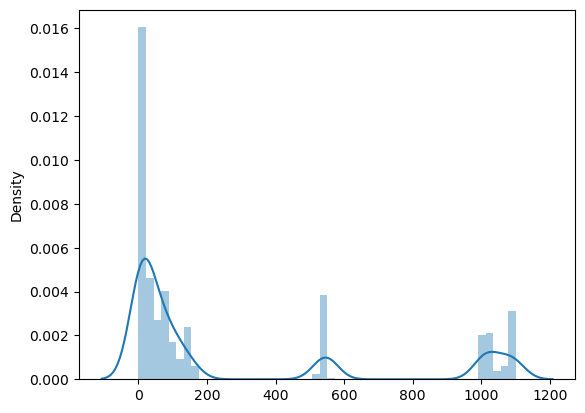

In [11]:
snb.distplot(gas_data)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [13]:
gas_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [14]:
features = gas_data.drop('TEY', axis=1)
features

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [15]:
target = gas_data['TEY']
target

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

### Feature Selection

In [16]:
def select_features(x_train, y_train, x_test):
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    fs.fit(x_train, y_train)
    x_train_fs = fs.transform(x_train)
    x_test_fs = fs.transform(x_test)
    return x_train_fs, x_test_fs, fs

In [17]:
x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=0.75, random_state=40)

In [18]:
x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)

Feature 0: 0.401514
Feature 1: 0.130822
Feature 2: 0.091344
Feature 3: 0.658978
Feature 4: 1.589799
Feature 5: 1.317639
Feature 6: 0.891150
Feature 7: 1.712482
Feature 8: 0.505825
Feature 9: 0.306865


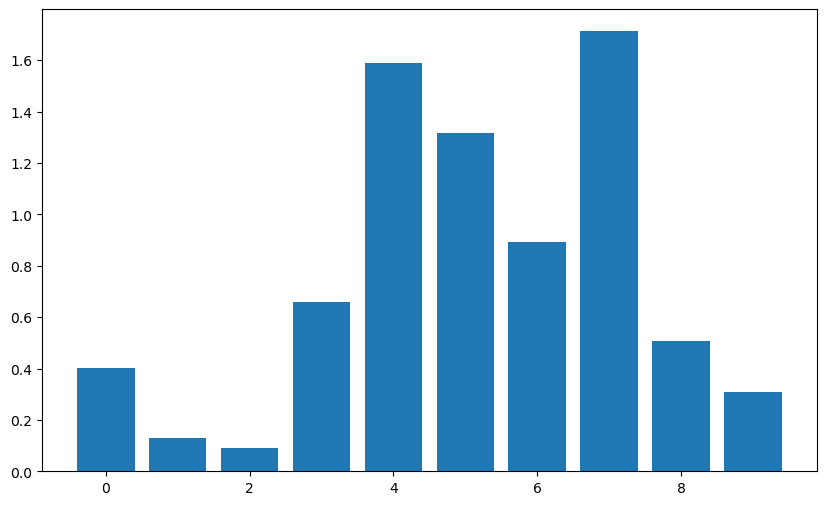

In [19]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

fig, ax = plt.subplots(figsize=(10, 6))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

### Using only Ambient Features

In [20]:
gas_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [21]:
amb_features = gas_data.drop(['AT', 'AP', 'AH', 'TEY', 'CO', 'NOX'], axis=1)
amb_features

,AFDP,GTEP,TIT,TAT,CDP
0,3.5000,19.663,1059.2,550.00,10.605
1,3.4998,19.728,1059.3,550.00,10.598
2,3.4824,19.779,1059.4,549.87,10.601
3,3.4805,19.792,1059.6,549.99,10.606
4,3.4976,19.765,1059.7,549.98,10.612
...,...,...,...,...,...
15034,3.5421,19.164,1049.7,546.21,10.400
15035,3.5059,19.414,1046.3,543.22,10.433
15036,3.4770,19.530,1037.7,537.32,10.483
15037,3.4486,19.377,1043.2,541.24,10.533


In [22]:
amb_target = gas_data['TEY']
amb_target

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

### Standardizing the Data

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
scaler.fit(amb_features)

StandardScaler()

In [26]:
amb_target = StandardScaler().fit_transform(amb_target.values.reshape(len(amb_target),1))[:,0]
amb_target

array([-1.23117246, -1.22990897, -1.23054071, ..., -1.5160891 ,
       -1.48134317, -1.42827666])

In [27]:
scaled_features = scaler.transform(amb_features)

In [28]:
new_gas_data = pd.DataFrame(scaled_features,columns=amb_features.columns)
new_gas_data

,AFDP,GTEP,TIT,TAT,CDP
0,-0.921232,-1.379101,-1.488376,0.585240,-1.357331
1,-0.921495,-1.363528,-1.482325,0.585240,-1.363676
2,-0.944385,-1.351309,-1.476275,0.568715,-1.360957
3,-0.946884,-1.348194,-1.464173,0.583969,-1.356424
4,-0.924389,-1.354663,-1.458123,0.582698,-1.350985
...,...,...,...,...,...
15034,-0.865850,-1.498657,-2.063184,0.103453,-1.543161
15035,-0.913470,-1.438759,-2.268905,-0.276638,-1.513247
15036,-0.951488,-1.410967,-2.789257,-1.026650,-1.467922
15037,-0.988848,-1.447624,-2.456474,-0.528337,-1.422598


### Train Test Split

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
x_train, x_test, y_train, y_test = train_test_split(amb_features,amb_target,train_size=0.75,random_state=40)

In [31]:
x_train.shape

(11279, 5)

In [32]:
x_test.shape

(3760, 5)

In [33]:
y_train.shape

(11279,)

In [34]:
y_test.shape

(3760,)

### Neural Network Model

In [35]:
from keras.models import Sequential
from keras.layers import Dense

In [36]:
model = Sequential()

In [37]:
model.add(Dense(10, input_dim=5, kernel_initializer='he_uniform', activation='tanh'))

In [38]:
model.add(Dense(6, kernel_initializer='he_uniform', activation='tanh'))

In [39]:
model.add(Dense(1, kernel_initializer='he_uniform', activation='linear'))

In [40]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [41]:
model.fit(x_train,y_train, epochs=100, batch_size=40)

Epoch 1/100
282/282 [==============================] - 2s 3ms/step - loss: 1.0436 - mse: 1.0436
Epoch 2/100
282/282 [==============================] - 1s 3ms/step - loss: 0.9943 - mse: 0.9943
Epoch 3/100
282/282 [==============================] - 1s 3ms/step - loss: 0.9954 - mse: 0.9954
Epoch 4/100
282/282 [==============================] - 1s 3ms/step - loss: 0.9952 - mse: 0.9952
Epoch 5/100
282/282 [==============================] - 1s 3ms/step - loss: 0.9947 - mse: 0.9947
Epoch 6/100
282/282 [==============================] - 1s 3ms/step - loss: 0.9948 - mse: 0.9948
Epoch 7/100
282/282 [==============================] - 1s 3ms/step - loss: 0.9944 - mse: 0.9944
Epoch 8/100
282/282 [==============================] - 1s 3ms/step - loss: 0.9946 - mse: 0.9946
Epoch 9/100
282/282 [==============================] - 1s 3ms/step - loss: 0.9949 - mse: 0.9949
Epoch 10/100
282/282 [==============================] - 1s 3ms/step - loss: 0.9943 - mse: 0.9943
Epoch 11/100
282/282 [=================

282/282 [==============================] - 1s 3ms/step - loss: 0.9939 - mse: 0.9939
Epoch 86/100
282/282 [==============================] - 1s 3ms/step - loss: 0.9937 - mse: 0.9937
Epoch 87/100
282/282 [==============================] - 1s 3ms/step - loss: 0.9940 - mse: 0.9940
Epoch 88/100
282/282 [==============================] - 1s 4ms/step - loss: 0.9944 - mse: 0.9944
Epoch 89/100
282/282 [==============================] - 1s 3ms/step - loss: 0.9941 - mse: 0.9941
Epoch 90/100
282/282 [==============================] - 1s 3ms/step - loss: 0.9936 - mse: 0.9936
Epoch 91/100
282/282 [==============================] - 1s 3ms/step - loss: 0.9938 - mse: 0.9938
Epoch 92/100
282/282 [==============================] - 1s 3ms/step - loss: 0.9941 - mse: 0.9941
Epoch 93/100
282/282 [==============================] - 1s 3ms/step - loss: 0.9940 - mse: 0.9940
Epoch 94/100
282/282 [==============================] - 1s 3ms/step - loss: 0.9936 - mse: 0.9936
Epoch 95/100
282/282 [=====================

In [42]:
scores = model.evaluate(x_test, y_test)

118/118 [==============================] - 1s 3ms/step - loss: 1.0211 - mse: 1.0211


### Tuning Hyperparameters

In [43]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_regression
from scikeras.wrappers import KerasRegressor, KerasClassifier
from tensorflow.keras.optimizers import Adam 
from keras.layers import Dropout

In [44]:
gas_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [45]:
new_features = gas_data.drop(['TEY','AT','AP','AH','CO','NOX'], axis = 1)
new_features

,AFDP,GTEP,TIT,TAT,CDP
0,3.5000,19.663,1059.2,550.00,10.605
1,3.4998,19.728,1059.3,550.00,10.598
2,3.4824,19.779,1059.4,549.87,10.601
3,3.4805,19.792,1059.6,549.99,10.606
4,3.4976,19.765,1059.7,549.98,10.612
...,...,...,...,...,...
15034,3.5421,19.164,1049.7,546.21,10.400
15035,3.5059,19.414,1046.3,543.22,10.433
15036,3.4770,19.530,1037.7,537.32,10.483
15037,3.4486,19.377,1043.2,541.24,10.533


In [46]:
new_target = gas_data[['TEY']]
new_target

,TEY
0,114.70
1,114.72
2,114.71
3,114.72
4,114.72
...,...
15034,111.61
15035,111.78
15036,110.19
15037,110.74


In [47]:
scaler.fit(new_features)

StandardScaler()

In [48]:
hyper_target = StandardScaler().fit_transform(new_target.values.reshape(len(new_target),1))[:,0]
hyper_target

array([-1.23117246, -1.22990897, -1.23054071, ..., -1.5160891 ,
       -1.48134317, -1.42827666])

In [49]:
hyper_features = scaler.transform(new_features)
hyper_features

array([[-0.92123188, -1.37910125, -1.48837592,  0.58524028, -1.35733078],
       [-0.92149498, -1.36352783, -1.4823253 ,  0.58524028, -1.36367619],
       [-0.94438456, -1.35130868, -1.47627469,  0.56871459, -1.36095673],
       ...,
       [-0.95148822, -1.41096688, -2.78925732, -1.02664984, -1.46792219],
       [-0.98884822, -1.44762432, -2.4564737 , -0.52833681, -1.42259784],
       [-1.01660512, -1.46463529, -2.05108275,  0.05768949, -1.37727349]])

In [50]:
hyp_gas_data = pd.DataFrame(hyper_features,columns=new_features.columns)
hyp_gas_data

,AFDP,GTEP,TIT,TAT,CDP
0,-0.921232,-1.379101,-1.488376,0.585240,-1.357331
1,-0.921495,-1.363528,-1.482325,0.585240,-1.363676
2,-0.944385,-1.351309,-1.476275,0.568715,-1.360957
3,-0.946884,-1.348194,-1.464173,0.583969,-1.356424
4,-0.924389,-1.354663,-1.458123,0.582698,-1.350985
...,...,...,...,...,...
15034,-0.865850,-1.498657,-2.063184,0.103453,-1.543161
15035,-0.913470,-1.438759,-2.268905,-0.276638,-1.513247
15036,-0.951488,-1.410967,-2.789257,-1.026650,-1.467922
15037,-0.988848,-1.447624,-2.456474,-0.528337,-1.422598


In [51]:
hyp_x_train, hyp_x_test, hyp_y_train, hyp_y_test = train_test_split(hyper_features, hyper_target, train_size=0.75, random_state=40)

In [52]:
hyp_x_train.shape

(11279, 5)

In [53]:
hyp_x_test.shape

(3760, 5)

In [54]:
hyp_y_train.shape

(11279,)

In [55]:
hyp_y_test.shape

(3760,)

In [56]:
from sklearn.metrics import mean_squared_error

##### Creating Model

In [57]:
final_model = Sequential()
final_model.add(Dense(4,input_dim = 5,kernel_initializer = 'uniform',activation = 'linear'))
final_model.add(Dropout(0.1))
final_model.add(Dense(2,input_dim = 4,kernel_initializer = 'uniform',activation = 'linear'))
final_model.add(Dropout(0.1))
final_model.add(Dense(1,activation = 'linear'))

In [58]:
adam = Adam(learning_rate = 0.01, amsgrad=True)

In [59]:
final_model.compile(loss = 'mean_squared_error', optimizer = adam, metrics = ['mse'])

In [60]:
final_model.fit(hyp_x_train,hyp_y_train, epochs=100, batch_size=20)

Epoch 1/100
564/564 [==============================] - 3s 3ms/step - loss: 0.1171 - mse: 0.1171
Epoch 2/100
564/564 [==============================] - 2s 4ms/step - loss: 0.1012 - mse: 0.1012
Epoch 3/100
564/564 [==============================] - 2s 3ms/step - loss: 0.0942 - mse: 0.0942
Epoch 4/100
564/564 [==============================] - 2s 4ms/step - loss: 0.1001 - mse: 0.1001
Epoch 5/100
564/564 [==============================] - 2s 4ms/step - loss: 0.0954 - mse: 0.0954
Epoch 6/100
564/564 [==============================] - 3s 4ms/step - loss: 0.0988 - mse: 0.0988
Epoch 7/100
564/564 [==============================] - 2s 4ms/step - loss: 0.0985 - mse: 0.0985
Epoch 8/100
564/564 [==============================] - 2s 4ms/step - loss: 0.0978 - mse: 0.0978
Epoch 9/100
564/564 [==============================] - 2s 3ms/step - loss: 0.0938 - mse: 0.0938
Epoch 10/100
564/564 [==============================] - 2s 4ms/step - loss: 0.0944 - mse: 0.0944
Epoch 11/100
564/564 [=================

564/564 [==============================] - 2s 4ms/step - loss: 0.0934 - mse: 0.0934
Epoch 86/100
564/564 [==============================] - 2s 4ms/step - loss: 0.0948 - mse: 0.0948
Epoch 87/100
564/564 [==============================] - 2s 4ms/step - loss: 0.0938 - mse: 0.0938
Epoch 88/100
564/564 [==============================] - 2s 4ms/step - loss: 0.0963 - mse: 0.0963
Epoch 89/100
564/564 [==============================] - 2s 4ms/step - loss: 0.0881 - mse: 0.0881
Epoch 90/100
564/564 [==============================] - 2s 4ms/step - loss: 0.0932 - mse: 0.0932
Epoch 91/100
564/564 [==============================] - 2s 4ms/step - loss: 0.0940 - mse: 0.0940
Epoch 92/100
564/564 [==============================] - 2s 4ms/step - loss: 0.0929 - mse: 0.0929
Epoch 93/100
564/564 [==============================] - 2s 4ms/step - loss: 0.0932 - mse: 0.0932
Epoch 94/100
564/564 [==============================] - 2s 4ms/step - loss: 0.0956 - mse: 0.0956
Epoch 95/100
564/564 [=====================

In [61]:
scores = final_model.evaluate(hyp_x_test, hyp_y_test)
print((final_model.metrics_names[1]))

118/118 [==============================] - 1s 3ms/step - loss: 0.0154 - mse: 0.0154
mse
